In [6]:
import pandas as pd
from  sklearn.tree import DecisionTreeClassifier

MD = pd.read_csv('heart.csv')
MD

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


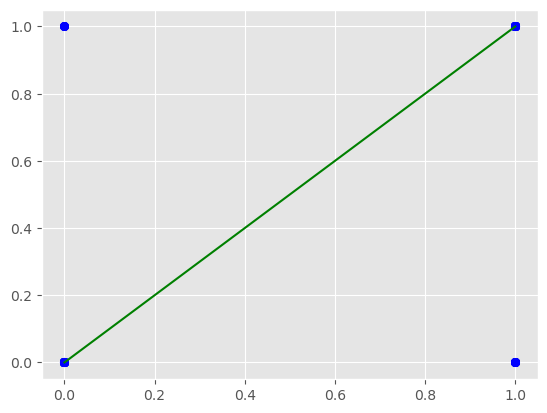

     Real  Predicted
179     0          0
228     0          0
111     1          0
246     0          0
60      1          1
..    ...        ...
249     0          0
104     1          1
300     0          0
193     0          0
184     0          0

[61 rows x 2 columns]


0.8360655737704918

In [60]:
import pandas as pd
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)
MD = pd.read_csv('heart.csv')
X = MD.drop(columns=['output'])
y = MD['output']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict( X_test )
accuracy_score(y_test,predictions)
correct_predictions = (predictions == y_test)
incorrect_predictions = (predictions != y_test)
p=np.arange(0,max(predictions)*1.1)
plt.plot(p,p,color='g')
plt.scatter(y_test, predictions,color='b')
plt.show()
compare_reg=pd.DataFrame({"Real":y_test,"Predicted": predictions})
print(compare_reg)


acc

Accuracy: 0.8360655737704918


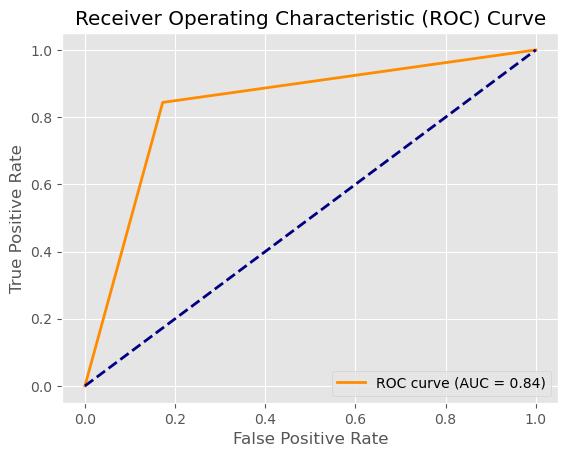

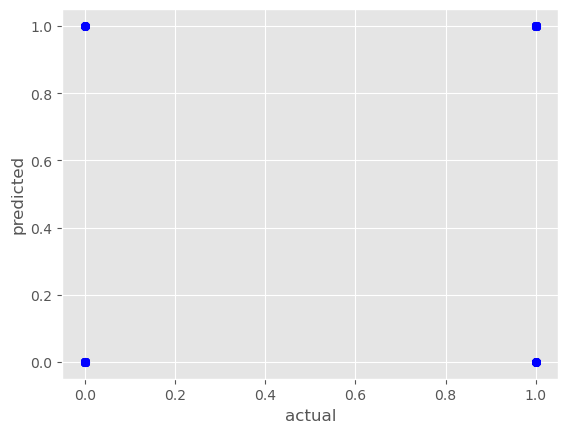

In [68]:
#without removing duplicates

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('heart.csv')
np.random.seed(42)
X = data.drop(columns=['output'])
y = data['output']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred,color='b')
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

Accuracy: 0.8688524590163934


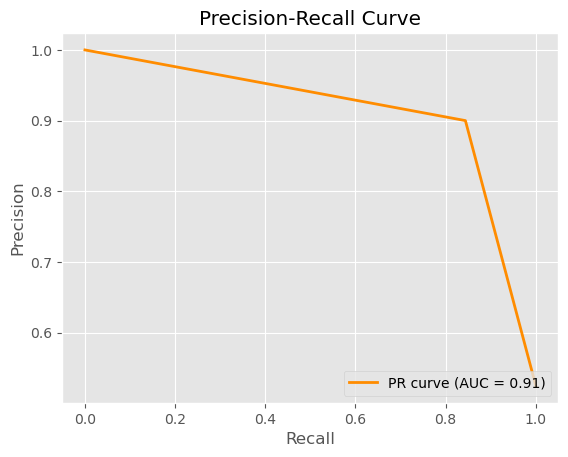

In [71]:
#after removing duplicates
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('heart.csv')
np.random.seed(42)
data_without_duplicates = data.drop_duplicates()
X = data_without_duplicates.drop('output', axis=1)
y = data_without_duplicates['output']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

precision, recall, _ = precision_recall_curve(y_test, predictions)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
target_variable = 'output'
features = data.drop(target_variable, axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(features, data[target_variable], test_size=0.2, random_state=42)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, nb_predictions)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, nb_predictions)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, nb_predictions)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8688524590163934
Confusion Matrix:
[[26  3]
 [ 5 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



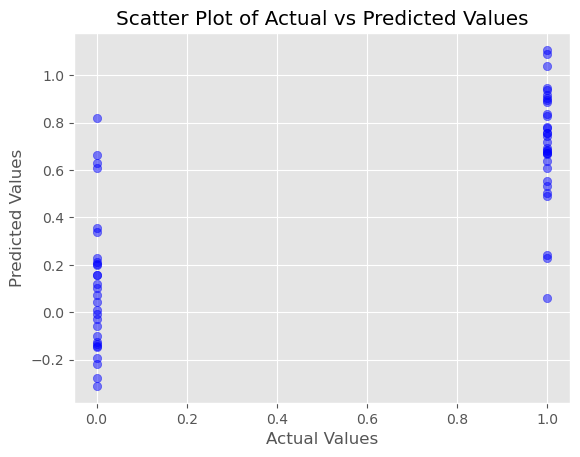

0.8360655737704918

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

np.random.seed(42)

y_regression = data['output']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y, test_size=0.2, random_state=42)


regression_model = LinearRegression()
regression_model.fit(X_reg_train, y_reg_train)


reg_predictions = regression_model.predict(X_reg_test)



acc = model.score(X_reg_test,y_reg_test)
plt.scatter(y_test, reg_predictions, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()


plt.show()
acc